$$ n^2 = 1 + \frac{Ne^2}{m\epsilon_0}\sum_j \frac{f_j}{\omega_j^2 - \omega^2 -i\gamma_j \omega} $$ 

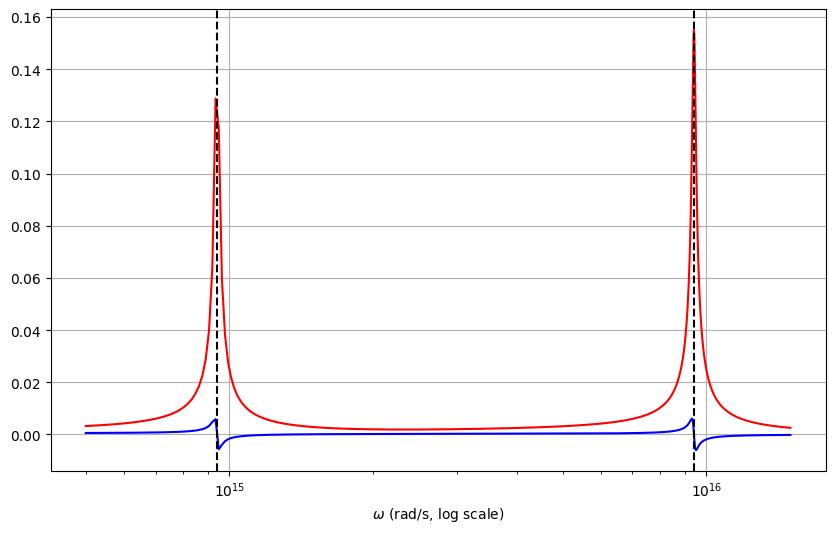

In [4]:
#real and imaginary parts of the refractive index (n) as a function of angular frequency (ω)

from scipy.constants import e, m_e, epsilon_0, c, N_A
import numpy as np
import matplotlib.pyplot as plt
N = N_A /( 22.4 * 10**(-3))
lambda_1 = 200*10**(-9)
lambda_2 = 2 * 10**(-6)
omega_1 = 2*np.pi*c/lambda_1
omega_2 = 2*np.pi*c/lambda_2
features = [
    {"f": 0.5, "omega_0": omega_1, "gamma": omega_1 / 50},
    {"f": 0.005, "omega_0": omega_2, "gamma": omega_2 / 50}
]
omega_min = 0.5*1e15
omega_max = 1.5*1e16
omega = np.linspace(omega_min, omega_max, 1000)
n_squared = np.ones_like(omega, dtype=complex)
for feature in features:
    f_j = feature["f"]
    omega_j = feature["omega_0"]
    gamma_j = feature["gamma"]
    term = f_j / (omega_j**2 - omega**2 - 1j * gamma_j * omega)
    n_squared += (N * e**2 / (m_e * epsilon_0)) * term
    
n_re = np.sqrt(n_squared.real) - 1
n_im = np.sqrt(n_squared.imag)

plt.figure(figsize=(10, 6))
plt.plot(omega, n_re ,color='blue')
plt.plot(omega, n_im , color='red')
plt.xlabel(r"$\omega$ (rad/s, log scale)")
plt.xscale("log")
plt.axvline(x=omega_1, color='black', linestyle='--')
plt.axvline(x=omega_2, color='black', linestyle='--')
plt.grid(True)
